In [9]:
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import multinomial, dirichlet
from importlib import reload

%matplotlib inline

import utils_MMM as mmm

reload(mmm)

<module 'utils_MMM' from 'c:\\Users\\Alexander\\Documents\\Github\\My-Python\\utils_MMM.py'>

In [10]:
def plot_em_run(likelihoods, ax):
    Ks = list(range(2, len(likelihoods) + 2))
    ax.scatter(Ks, likelihoods)
    ax.set_title('Likelihood by values of K')
    ax.set_ylabel('Likelihood')
    ax.set_xticks(Ks)
    ax.set_xticklabels(Ks)
    ax.set_xlabel('K')

def plot_simplex(ax):
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=4)

    ax.triplot(trimesh, linewidth=1, color='darkgray')
    ax.axis('off')
    
    ax.text(-0.09, -0.06, 'X1', size=20)
    ax.text(0.465, 0.9, 'X2', size=20)
    ax.text(1.07, -0.06, 'X3', size=20)
    
    tick_spacement = 1/16

    return trimesh

def plot_trinomial(trimesh, x, color, ax, z, n=None):
    n = n if n is not None else x.sum()
    counts = trimesh_coords_to_bucket_counts(trimesh, x)
    ax.scatter(x=trimesh.x, y=trimesh.y, color=color, 
               zorder=z,
               s=(np.array(counts) / n)*100000)

def plot_trinomials(X, colors, ax):
    trimesh = plot_simplex(ax)
    n = np.sum([x.sum() for x in X])
    z=100
    for x, color in zip(X, colors):
        plot_trinomial(trimesh, x, color, ax, z, n)
        z -= 1

In [11]:
def make_dataset(n, alpha, beta):
    xs = []
    for k, alpha_k in enumerate(alpha):
        n_k = int(n * alpha_k)
        x = multinomial.rvs(n=16, p=beta[k], size=n_k)
        xs.append(x)
    return xs

alpha = [1/3]
beta = np.array([[0.25, 0.25, 0.5]])
X = make_dataset(10000, alpha, beta)
colors = ['coral']
print(X[0])


[[ 2  6  8]
 [ 2  4 10]
 [ 1  3 12]
 ...
 [ 3  5  8]
 [ 5  3  8]
 [ 6  5  5]]


In [12]:
def plot_em_run_full(likelihoods, bics):
    fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
    axes = axes.ravel()

    Ks = list(range(2, len(likelihoods) + 2))
    axes[0].scatter(Ks, likelihoods)
    axes[0].set_title('Likelihood by values of K')
    axes[0].set_ylabel('Likelihood')

    axes[1].scatter(Ks, bics)
    axes[1].scatter(np.argmin(bics) + 2, np.min(bics), color='red')
    axes[1].set_title('BIC by values of K')
    axes[1].set_ylabel('BIC')

    for ax in axes:
        ax.set_xticks(Ks)
        ax.set_xticklabels(Ks)
        ax.set_xlabel('K')

In [13]:
alpha = [0.1, 0.1, 0.8]
beta = np.array([[0.1, 0.1, 0.8], 
                 [0.1, 0.8, 0.1], 
                 [0.8, 0.1, 0.1]])
X = make_dataset(10000, alpha, beta)
colors = ('coral', 'forestgreen', 'purple')
X


[array([[ 1,  0, 15],
        [ 0,  2, 14],
        [ 3,  1, 12],
        ...,
        [ 1,  1, 14],
        [ 2,  0, 14],
        [ 1,  2, 13]]),
 array([[ 3, 12,  1],
        [ 2, 13,  1],
        [ 1, 13,  2],
        ...,
        [ 3, 12,  1],
        [ 2, 14,  0],
        [ 1, 14,  1]]),
 array([[10,  3,  3],
        [12,  2,  2],
        [13,  3,  0],
        ...,
        [15,  0,  1],
        [14,  1,  1],
        [14,  0,  2]])]

  0%|          | 0/19 [00:00<?, ?it/s]iteration 0
loss1 -42219.110628975825
term1 [-0.29206105 -0.23790475 -0.22729531 ... -0.22484597 -0.22513772
 -0.20927324]
term2 [-13.96611068  -2.80638522  -3.28977028 ...  -4.08393236  -4.00091022
 -16.92196256]
loss2 -40389.25799424025
loss1 -56577.33501476135
term1 [-0.11482055 -0.33344308 -0.37627215 ... -0.38615984 -0.38498209
 -0.44902507]
term2 [-19.99346389  -3.13874193  -2.86440024 ...  -3.54343229  -3.41489101
 -15.21139908]
loss2 -53843.23550459256
Loss: -53843.235505
loss1 -35265.047190667174
term1 [-0.43484196 -0.34244145 -0.27579421 ... -0.26399364 -0.25924342
 -0.14084739]
term2 [-12.37842707  -3.07258855  -3.98064409 ...  -4.074821    -4.97294795
 -19.86214768]
loss2 -33347.32663614167
loss1 -54182.16906631882
term1 [-0.0009483  -0.22207869 -0.38157706 ... -0.40981788 -0.42118597
 -0.70452813]
term2 [-25.150111    -3.96794247  -2.98244552 ...  -4.13486558  -3.23680047
 -12.96035784]
loss2 -51888.36913571202
Loss: -51888.369136
loss

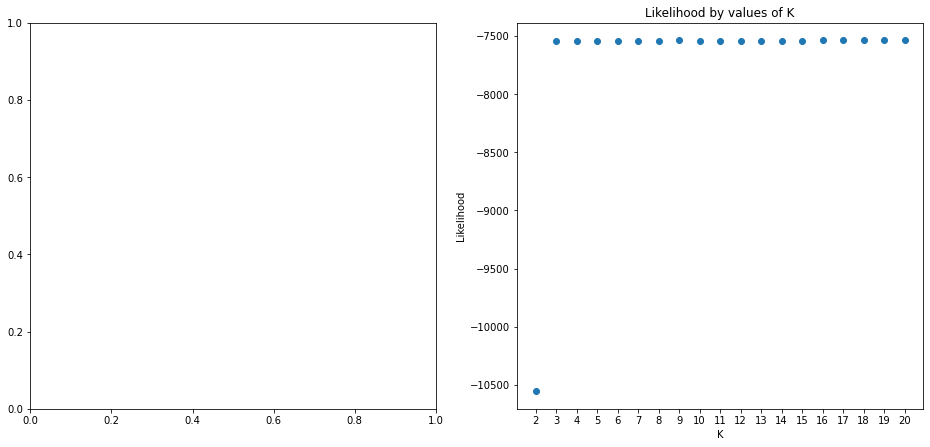

In [14]:
likelihoods, bics, icl_bics, best_alpha, best_beta, best_gamma = mmm.run_em(X, criterion='bic')

fig, axes = plt.subplots(ncols=2, figsize=(16, 7.1))
axes = axes.ravel()
#plot_trinomials(X, colors, axes[0])
plot_em_run(likelihoods, axes[1])

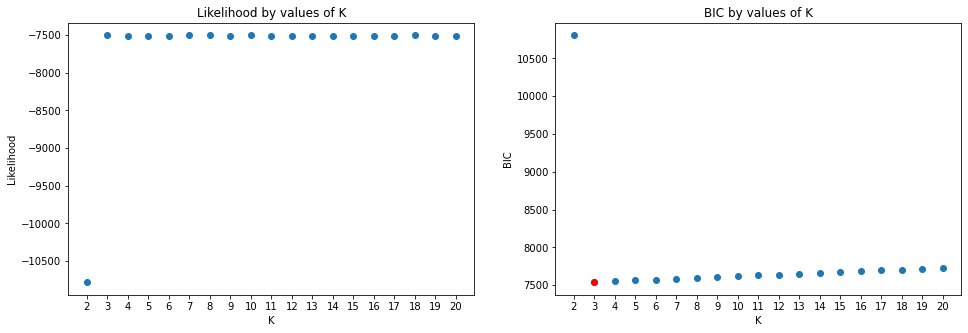

In [9]:
plot_em_run_full(likelihoods, bics)

https://github.com/biarne-a/MNMM/blob/main/notebooks/Runs%20on%20generate%20dataset.ipynb

In [119]:
import utils_MMM as mmm

In [12]:
from nltk.tokenize import word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
import re, nltk, string
from copy import deepcopy

nltk.download('punkt')


class clean_text(TransformerMixin):

    def __init__(self, verbose : bool = True):
        self.verbose = verbose

    def fit(self, X, y=None):
        return self    
    
    def transform(self, X):    
        corpus = deepcopy(X)
        cleaned_text = []
        # Preprocess:
        for z, se in enumerate(corpus.tolist()):
            if (z % 1000 == 0) & self.verbose: print('Processing document {}'.format(z))
            tokens = word_tokenize(se)
            # convert to lower case
            tokens = [w.lower() for w in tokens]
            # remove punctuation from each word
            table = str.maketrans('', '', string.punctuation)
            stripped = [w.translate(table) for w in tokens]
            # remove remaining tokens that are not alphabetic
            words = [word for word in stripped if word.isalpha()]    
            # filter out stop words
            #stop_words = set(stopwords.words('english'))
            #words = [w for w in words if not w in stop_words]
            cleaned_text.append(' '.join(words))
        return cleaned_text  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
import pandas as pd


# initialize list of lists 
data = [["Fermat'S letzter Satz"], 
        ['Mein Name ist Alex.'], 
        ['Hier kommt Alexander'], ['Hier kommt der Meister aller Klassen'], ['ich liebe es'], ['Das ist tool, hurra'], 
        ['So dala, Also wirklich super und einzigartig!!!!'], 
        ['Also wirklich super und einzigartig!!!!'], ['Jetzt reichts aber wirklich'], ['Also wirklich super und einzigartig!!!!'], ['Jetzt reichts aber wirklich']
        ] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['text']) 
df

,text
0,Fermat'S letzter Satz
1,Mein Name ist Alex.
2,Hier kommt Alexander
3,Hier kommt der Meister aller Klassen
4,ich liebe es
5,"Das ist tool, hurra"
6,"So dala, Also wirklich super und einzigartig!!!!"
7,Also wirklich super und einzigartig!!!!
8,Jetzt reichts aber wirklich
9,Also wirklich super und einzigartig!!!!


In [16]:
cl =  mmm.clean_text(verbose=False)

X_cleaned = cl.fit_transform(df['text']) 
X_cleaned

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['fermat s letzter satz',
 'mein name ist alex',
 'hier kommt alexander',
 'hier kommt der meister aller klassen',
 'ich liebe es',
 'das ist tool hurra',
 'so dala also wirklich super und einzigartig',
 'also wirklich super und einzigartig',
 'jetzt reichts aber wirklich',
 'also wirklich super und einzigartig',
 'jetzt reichts aber wirklich']

In [17]:

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

#new_regex = '(?u)(?:(?!\d)\w)+\\w+'
#new_regex = '(?u)\\b\\w\\w+\\b'

cnt = CountVectorizer(max_features=None, #max_df=0.1,
                       lowercase=True, 
                       token_pattern = '(?u)(?:(?!\d)\w)+\\w+',  
                       analyzer = 'word',  #'word', 'char_wb'
                       ngram_range=(1, 1), tokenizer = None,     # use stemmer or lemmatization
                       stop_words = None)    #ENGLISH_STOP_WORDS

In [18]:
X_new = cnt.fit_transform(X_cleaned).toarray()   # count vectors, 'histograms' 

In [19]:
#mapping of terms to feature indices.
print(cnt.vocabulary_)

{'fermat': 10, 'letzter': 18, 'satz': 24, 'mein': 20, 'name': 22, 'ist': 14, 'alex': 1, 'hier': 11, 'kommt': 17, 'alexander': 2, 'der': 7, 'meister': 21, 'aller': 3, 'klassen': 16, 'ich': 13, 'liebe': 19, 'es': 9, 'das': 6, 'tool': 27, 'hurra': 12, 'so': 25, 'dala': 5, 'also': 4, 'wirklich': 29, 'super': 26, 'und': 28, 'einzigartig': 8, 'jetzt': 15, 'reichts': 23, 'aber': 0}


In [20]:
print(cnt.get_feature_names())

['aber', 'alex', 'alexander', 'aller', 'also', 'dala', 'das', 'der', 'einzigartig', 'es', 'fermat', 'hier', 'hurra', 'ich', 'ist', 'jetzt', 'klassen', 'kommt', 'letzter', 'liebe', 'mein', 'meister', 'name', 'reichts', 'satz', 'so', 'super', 'tool', 'und', 'wirklich']


In [113]:
likelihoods, bics, icl_bics, best_alpha, best_beta, best_gamma = run_em(X_new, criterion='bic')

  0%|          | 0/19 [00:00<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'shape'

In [91]:
X[0].shape

(3333, 3)

In [75]:
X_new.shape

(11, 30)

In [28]:
reload(mmm)

model = mmm.MultinomialExpectationMaximizer(3, restarts=1)

_, alpha, beta, gamma = model.fit(X_new)
#beta
#alpha
#log_likelihood = model.compute_log_likelihood(X_new, alpha, beta)


iteration 0
Loss: -113.028371
Loss: -109.189305
Loss: -95.919251
Loss: -88.138640
Loss: -86.615112
Loss: -85.162323
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss: nan
Loss

In [154]:
#model._train_once(X_new)
def _train_once(X):
    loss = float('inf')
    C = X.shape[1]
    alpha, beta = model._init_params(X)

    for it in range(model._max_iter):
        prev_loss = loss
        gamma = model._e_step(X, alpha, beta)
        alpha, beta = model._m_step(X, gamma)
        loss = model._compute_vlb(X, alpha, beta, gamma)
        if it > 0 and (np.abs((prev_loss - loss) / prev_loss) < model._rtol):
            break
    return alpha, beta, gamma, loss


In [159]:
_train_once(X_new)


(array([0.27272727, 0.18181818, 0.09090909, 0.45454545]),
 array([[2.39484211e-014, 6.13017262e-015, 1.40837906e-192,
         6.38673252e-013, 1.76470588e-001, 5.88235294e-002,
         4.51997919e-157, 6.38673252e-013, 1.76470588e-001,
         6.52297303e-237, 3.83160223e-014, 6.38673252e-013,
         4.51997919e-157, 6.52297303e-237, 6.13017262e-015,
         2.39484211e-014, 6.38673252e-013, 6.38673252e-013,
         3.83160223e-014, 6.52297303e-237, 6.13017262e-015,
         6.38673252e-013, 6.13017262e-015, 2.39484211e-014,
         3.83160223e-014, 5.88235294e-002, 1.76470588e-001,
         4.51997919e-157, 1.76470588e-001, 1.76470588e-001],
        [5.08903948e-014, 1.25000000e-001, 6.00645382e-101,
         1.28997991e-065, 4.40086754e-014, 3.40978745e-014,
         1.25000000e-001, 1.28997991e-065, 4.40086754e-014,
         1.37425057e-015, 8.87140300e-137, 1.28997991e-065,
         1.25000000e-001, 1.37425057e-015, 2.50000000e-001,
         5.08903948e-014, 1.28997991e-065

In [150]:
X = X_new.copy()
X.shape

(11, 30)

In [152]:
loss = float('inf')
C = X.shape[1]
print(C)


30


In [153]:
alpha, beta = model._init_params(X)
alpha
beta#.shape

array([[0.03294434, 0.03481105, 0.03438411, 0.04182306, 0.03206185,
        0.03424065, 0.02723356, 0.02567815, 0.03388847, 0.03248458,
        0.02740565, 0.03415555, 0.02789833, 0.03503631, 0.03348939,
        0.03525813, 0.03926155, 0.03203065, 0.03641407, 0.03198328,
        0.03226065, 0.03924967, 0.03461618, 0.04015722, 0.02597993,
        0.03180498, 0.0331308 , 0.03475769, 0.03621047, 0.0293497 ],
       [0.02582397, 0.02983935, 0.0318967 , 0.03205026, 0.0366372 ,
        0.03153456, 0.03649995, 0.03103714, 0.03388419, 0.03584191,
        0.03584169, 0.03118013, 0.03508613, 0.02722987, 0.03358785,
        0.03395122, 0.03412392, 0.02260231, 0.03286767, 0.03806504,
        0.03715837, 0.04038532, 0.02717361, 0.03288724, 0.03581245,
        0.03650811, 0.03555101, 0.03202639, 0.03986553, 0.03305091],
       [0.03641363, 0.03561471, 0.02922953, 0.03465473, 0.04193952,
        0.03002692, 0.03474704, 0.02793714, 0.03505867, 0.04125762,
        0.03969415, 0.03073608, 0.0300566 , 0.

In [155]:
prev_loss = loss
gamma = model._e_step(X, alpha, beta)
alpha, beta = model._m_step(X, gamma)
loss = model._compute_vlb(X, alpha, beta, gamma)


In [6]:
((1/3) + 1 + 1 +1 +1)/15

0.28888888888888886

In [157]:


for it in range(model._max_iter):
    prev_loss = loss
    gamma = model._e_step(X, alpha, beta)
    #print('gamma', gamma)
    alpha, beta = model._m_step(X, gamma)
    print('alpha' ,alpha)
    loss = model._compute_vlb(X, alpha, beta, gamma)
    print(loss)
    if it > 0 and (np.abs((prev_loss - loss) / prev_loss) < model._rtol):
        break


alpha [0.32498403 0.47576261 0.16814028 0.03111308]
-102.76088472670997
alpha [0.25326846 0.36118025 0.30130485 0.08424644]
-84.36488806561486
alpha [0.18485381 0.27910876 0.35570408 0.18033335]
-68.49290541605583
alpha [0.18182038 0.27273429 0.36362715 0.18181818]
-67.3360545811029
alpha [0.18181818 0.27272727 0.36363636 0.18181818]
-67.33509299381471


In [52]:
loss

nan

In [ ]:
def fit(self, X):
    '''
    Starts with random initialization *restarts* times
    Runs optimization until saturation with *rtol* reached
    or *max_iter* iterations were made.

    X: (N, C), data points
    K: int, number of clusters
    '''
    best_loss = -float('inf')
    best_alpha = None
    best_beta = None
    best_gamma = None

    for it in range(self._restarts):
        alpha, beta, gamma, loss = self._train_once(X)
        if loss > best_loss:
            best_loss = loss
            best_alpha = alpha
            best_beta = beta
            best_gamma = gamma

    return best_loss, best_alpha, best_beta, best_gamma
